Modèle D'Einstein de la chaleur spécifique des solides

In [2]:
# Tout d'abord, les bibliothèques de fonctions sont chargées
import matplotlib.pyplot as plt # importer le module Matplotlib comme "plt"
import numpy as np # importer le module NumPy comme "np"
import sys
from matplotlib import rc # Permet l'utilisation de LateX dans les
#legendes des figures

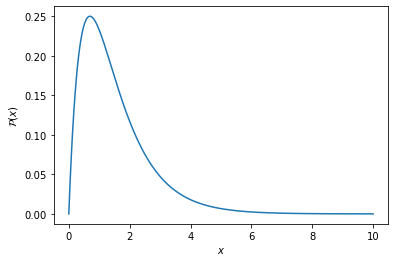

In [3]:
# Tracé de la densité de probabilité des modes
# en fonction de x = hbar omega_0/k_B T
fig, ax = plt.subplots()
x = np.linspace(0, 10, 250)
plt.plot(x, np.exp(-x)*(1-np.exp(-x)))
plt.xlabel(r'$x$')
plt.ylabel(r'$\mathcal{P}(x)$')
plt.show()

In [4]:
# Pour commencer, fixons une valeur de la température.
# x = hbar omega_0/k_B T
x = 0.8
# Nombre de modes
N = 5
# x et N sont les deux paramètres principaux à changer pour observer le
# comportement du système.

# Liste des niveaux
Niveaux = {}
# Nous supposons que le plus haut niveau excité correspond à 2N.
# Cela peut être insuffisant à haute température, où les probabilités
# d'occupation des niveaux les plus excités ne sont pas négligeables.
for j in range(1,2*N+1):
    Niveaux[j] = 0
# Tirage aléatoire d'un nombre de quanta pour chaque mode
for i in range(1,2*N+1):
    # Nous devons tirer N nombres aléatoires, suivant une distribution P(X) connue
    # Pour cela, nous utilisons une méthode d'inversion.
    n_q = -1.
    while (n_q <= 0):
        # Nous tirons d'abord un nombre aléatoire dans [0;1] avec une distrivution uniforme
        y = np.random.random()
        # Ce nombre est la probabilité de notre variable aléatoire.
        # Nous pouvons alors inverser la loi P(N) pour trouver le nombre de quanta
        # correspondant au nombre tiré
        n_q = np.log(np.exp(x)*(1-np.exp(-x))/y)/x
        # Le nombre de quanta est un nombre entier
        n_q = int(n_q)
    for j in range(1,2*N+1):
        if (j==n_q):
            Niveaux[j] += 1

# On peut vérifier ici que les niveaux sont bien remplis, et qu'au fur et à mesure que la
# température augmente, les niveaux de plus haute énergie se peuplent.
print(Niveaux)

{1: 4, 2: 3, 3: 1, 4: 1, 5: 0, 6: 1, 7: 0, 8: 0, 9: 0, 10: 0}


In [5]:
# Nous créons ici la liste des quanta pour chaque 
# niveau d'excitation.
Quanta = {}
for key in Niveaux.keys():
    niv = int(key)
    n_q = int(Niveaux[key])
    # Cette commande crée un ensemble de points régulièrement espacés entre
    # 0 et 1.
    # Afin de garantir une meilleure visualisation, nous devons enlever les
    # points 0 et 1, présents par défaut dans la liste.
    # Le nombre de points restants dans le bloc d'instruction suivant correspond
    # bien au nombre de quanta par niveau.
    list_mod = np.linspace(0, 1, n_q + 2)
    list_mod = np.delete(list_mod, 0)
    if (np.size(list_mod)==1):
        list_mod = []
    else:
        list_mod = np.delete(list_mod, -1)
    Quanta[key] = list_mod

# Nous pouvons vérifier l'adéquation avec les résultats du bloc précédent.
# Les nombres ici représentent des positions régulièrement espacés sur l'axe  des 
# abscisses; leur signification est purement graphique.
# Cependant, nous pouvons compter le nombre de quanta par modes et comparer avec 
# la "liste" Niveaux.
print(Quanta)

{1: array([0.2, 0.4, 0.6, 0.8]), 2: array([0.25, 0.5 , 0.75]), 3: array([0.5]), 4: array([0.5]), 5: [], 6: array([0.5]), 7: [], 8: [], 9: [], 10: []}


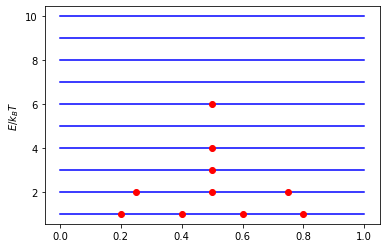

In [6]:
# Tracer la figure
fig, ax = plt.subplots()
ax.cla()
for i in range(1,2*N+1):
    niv = i
    # Tracer les niveaux d'énergie
    ax.plot([0,1],[niv,niv],'b')
    # Répartition des quanta sur les niveaux d'énergie
    for elem in Quanta[niv]:
        plt.plot(elem,niv,'r', linestyle= 'None', marker= 'o')
plt.ylabel(r'$E/k_B T$') # Nom de l'axe des ordonnées
plt.show()